In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def add_noise(image):
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    # Add the Gaussian noise to the image
    img_gauss = cv2.add(image,gauss)
    return img_gauss

In [4]:
def display_images(images, names):
    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = []

    for index, image in enumerate(images):
        ax.append(fig.add_subplot(1, len(images), index + 1))
        ax[-1].set_title(names[index])
        plt.imshow(image)
    plt.show()

In [12]:
def plot_histogram(images, names):
    fig = plt.figure(figsize=(20, 5), dpi=100)
    ax = []

    for index, image in enumerate(images):
        for i, col in enumerate(['b', 'g', 'r']):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            ax.append(fig.add_subplot(1, len(images), index + 1))
            ax[-1].set_title(names[index])
            plt.plot(hist, color = col)
            plt.xlim([0, 256])

    plt.show()

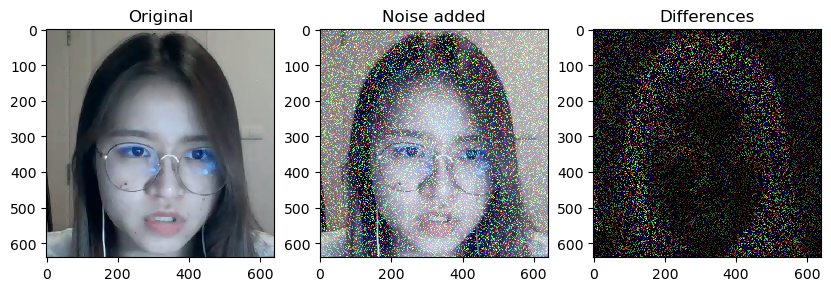

In [24]:
# img = cv2.imread("input.png")
img = cv2.imread("o.png")[...,::-1]
noisy_img = add_noise(img)
diff = cv2.absdiff(img, noisy_img)
display_images([img, noisy_img, diff], ["Original", "Noise added", "Differences"])

/tmp/ipykernel_27562/165972780.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax.append(fig.add_subplot(1, len(images), index + 1))


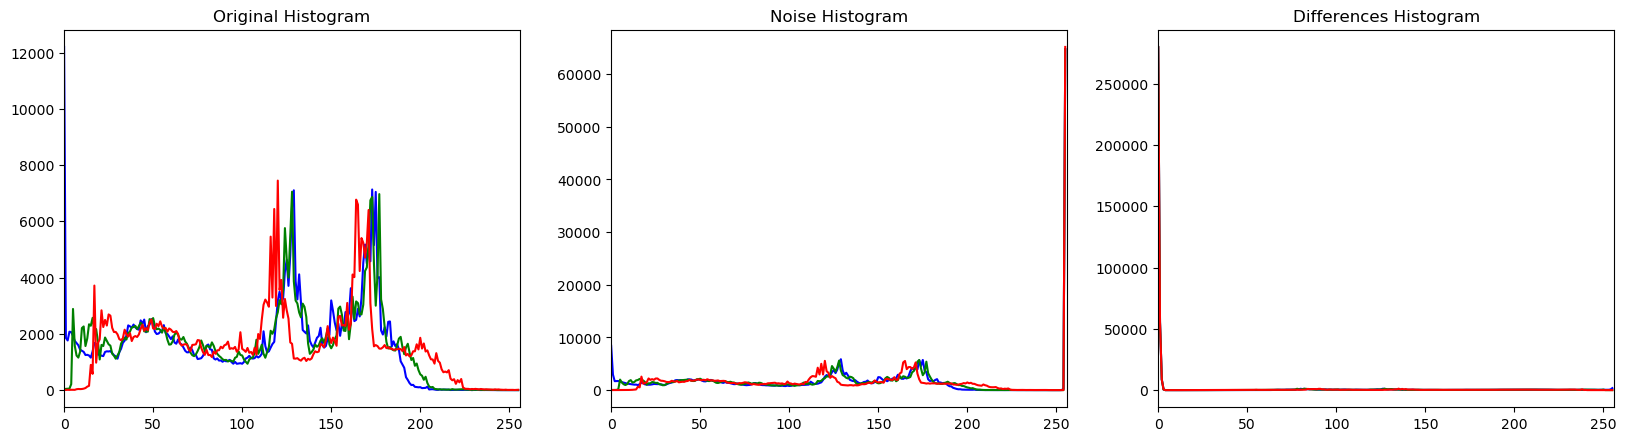

In [25]:
plot_histogram([img, noisy_img, diff], ["Original Histogram", "Noise Histogram", "Differences Histogram"])